In [1]:
import sys
sys.path.append('/public/src')
from factor_evaluation_server import FactorEvaluation,DataService # type: ignore
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import pandas_ta as ta

In [2]:
ds=DataService()
df=ds['ETHUSDT_15m_2020_2025']['2021-10-01':]

In [3]:
evaluator=FactorEvaluation(df=df,future_return_periods=10)

# 定义因子！

In [44]:
def trend_enhanced_sumd(df, window=20, trend_window=20):
    """
    改进4：叠加趋势过滤层
    金融逻辑：趋势方向上的信号应比逆趋势信号权重更高
    改进点：引入EMA趋势方向作为信号乘数
    """
    close = df['close']
    price_diff = close.diff()
    
    # 计算趋势强度
    ema_fast = ta.ema(close, length=trend_window//2)
    ema_slow = ta.ema(close, length=trend_window)
    trend_direction = np.where(ema_fast > ema_slow, 1, -1)
    
    gain = price_diff.where(price_diff > 0, 0)
    loss = (-price_diff).where(price_diff < 0, 0)
    
    sum_gain = gain.rolling(window).sum()
    sum_loss = loss.rolling(window).sum()
    
    # 趋势强化因子
    raw_factor = (sum_gain - sum_loss) / (sum_gain + sum_loss + 1e-12)
    factor = raw_factor * trend_direction * (abs(raw_factor) ** 0.5)
    
    return factor

# 因子测试

In [45]:
evaluator.set_factor(
    factor_func=trend_enhanced_sumd,
    factor_name='trend_enhanced_sumd'
)


📊 单币种 (single) 详细评估结果:
--------------------------------------------------
🔗 相关性分析:
   IC (Pearson): 0.000814
   Rank_IC (Spearman): 0.000264
📊 信息比率:
   IR: 0.390350
   有效分组数: 10
📊 因子分布:
📋 数据概况:
   数据长度: 130517
   因子列: trend_enhanced_sumd
   收益率列: future_return
   未来收益周期: 10
--------------------------------------------------

🖼️  单币种 (single) 图片展示:
----------------------------------------
📊 显示分组分析图...


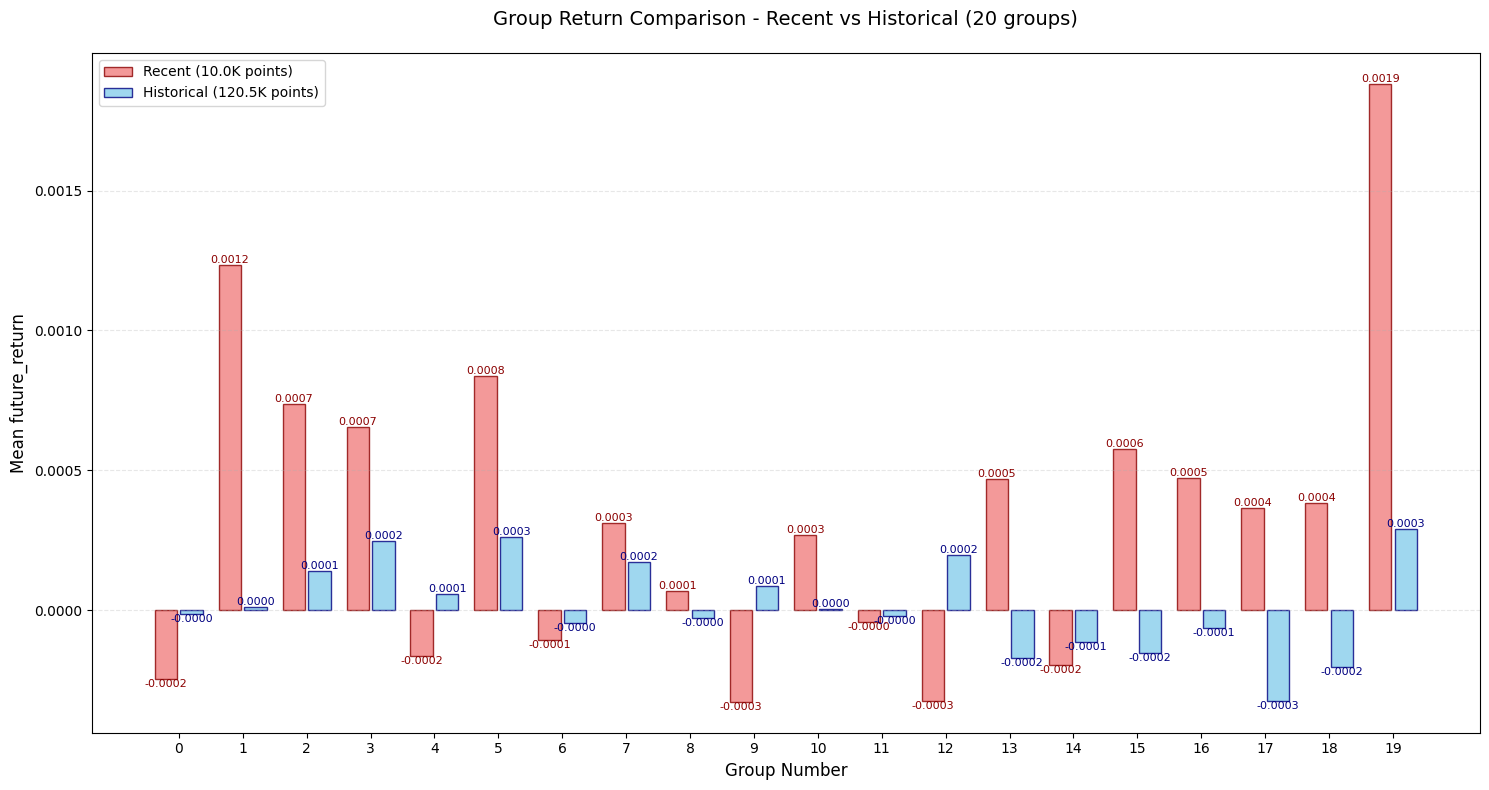

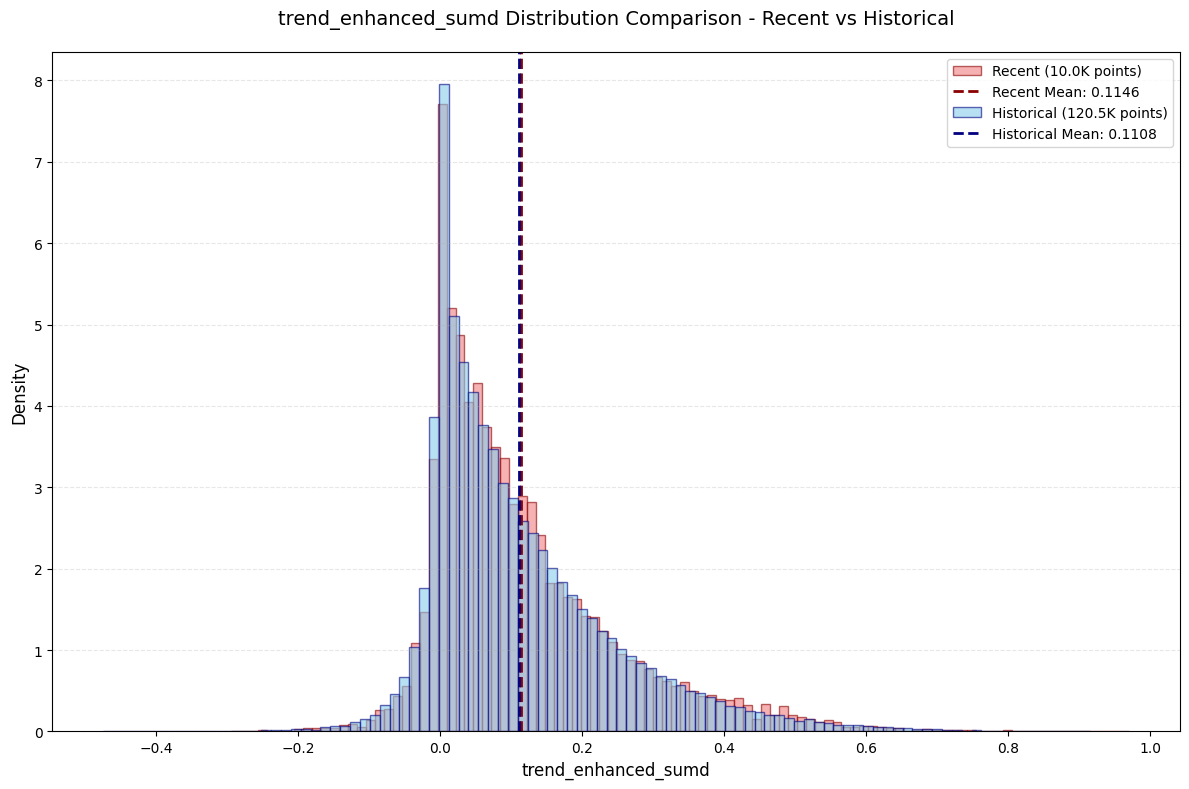

📈 显示因子分布图...
✅ 已显示 2 个图片
----------------------------------------


In [46]:
result=evaluator.run_full_evaluation(run_stationarity_test=False)

In [47]:
print(result)

{'correlation_analysis': {'IC': 0.000814280491165389, 'Rank_IC': 0.000264488917458846}, 'information_ratio': {'IR': 0.3903501917064828, 'group_correlations': [0.007241124998669474, 0.0005006875777700226, 0.004991421044279766, 0.009997549777832692, 0.003031037432484502, 0.0006702214596322023, -0.011041340021292362, 0.0060529781570902086, -0.009569962835549629, 0.03769017988052601], 'n_groups': 10}, 'group_analysis': {'group_stats':        val_min  val_max  val_mean  return_mean  return_std  count
group                                                            
0      -0.4739  -0.0256   -0.0666      -0.0000      0.0111   6526
1      -0.0256  -0.0057   -0.0139       0.0001      0.0112   6526
2      -0.0057   0.0004   -0.0018       0.0002      0.0112   6526
3       0.0004   0.0067    0.0032       0.0002      0.0109   6526
4       0.0067   0.0155    0.0110       0.0001      0.0110   6526
5       0.0155   0.0255    0.0204       0.0003      0.0105   6525
6       0.0255   0.0363    0.0308    